In [2]:
import tensorflow as tf
from tensorflow import keras
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from PIL import Image
import PIL
from tensorflow.keras import datasets, layers, models
import keras_tuner as kt

import os
from keras.layers import Lambda, Input, Dense, Dropout, Flatten, Conv2D, MaxPooling2D, Activation, SpatialDropout2D, GlobalAveragePooling2D 

In [3]:
train_dir = "C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Train_Test_Split/train/" 

In [4]:
test_dir = "C:/Users/kjosh/OneDrive/Documents/UChicago/ADSP 31009 - Machine Learning & Predictive Analytics/Final Project/Train_Test_Split/test/" 

In [5]:
target_size = (224, 224)

In [6]:
batch_size = 100

In [7]:
train_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255,
    shear_range = 0.3,
    zoom_range = 0.3,
    horizontal_flip=True,
    rotation_range = 30
)

In [8]:
train_generator = train_datagen.flow_from_directory(
        train_dir,
        target_size=target_size,
        batch_size=batch_size,
        class_mode='categorical')

Found 17651 images belonging to 120 classes.


In [9]:
test_datagen = tf.keras.preprocessing.image.ImageDataGenerator(
    rescale=1./255)

In [10]:
test_generator = test_datagen.flow_from_directory(
    test_dir,
    target_size=target_size,
    batch_size=batch_size,
    class_mode='categorical',
    shuffle=False
)

Found 4475 images belonging to 120 classes.


In [11]:
# Image shape of each training observation
image_shape = train_generator.image_shape
print("Image shape of each training observation:", image_shape)

Image shape of each training observation: (224, 224, 3)


In [12]:
classifier = keras.Sequential()

classifier.add(Conv2D(32, (3, 3), input_shape=(224, 224, 3), activation='relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(MaxPooling2D(pool_size=(2, 2)))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(Conv2D(32, (3, 3), activation='relu'))
classifier.add(Flatten())
classifier.add(Dense(units=64, activation='relu'))
classifier.add(Dropout(0.5))
classifier.add(Dense(units=120, activation='softmax'))

In [13]:
classifier.compile(
    optimizer=keras.optimizers.Adam(learning_rate=.001),
    loss='categorical_crossentropy',
    metrics=['accuracy']
)

In [14]:
classifier.summary()

Model: "sequential"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d (Conv2D)             (None, 222, 222, 32)      896       
                                                                 
 conv2d_1 (Conv2D)           (None, 220, 220, 32)      9248      
                                                                 
 max_pooling2d (MaxPooling2  (None, 110, 110, 32)      0         
 D)                                                              
                                                                 
 conv2d_2 (Conv2D)           (None, 108, 108, 32)      9248      
                                                                 
 conv2d_3 (Conv2D)           (None, 106, 106, 32)      9248      
                                                                 
 flatten (Flatten)           (None, 359552)            0         
                                                        

In [15]:
history = classifier.fit(train_generator, epochs=10, steps_per_epoch=10, validation_data = test_generator)

Epoch 1/10
10/10 [==============================] - 279s 28s/step - loss: 4.9270 - accuracy: 0.0170 - val_loss: 4.7872 - val_accuracy: 0.0103
Epoch 2/10
10/10 [==============================] - 270s 28s/step - loss: 4.7882 - accuracy: 0.0070 - val_loss: 4.7873 - val_accuracy: 0.0114
Epoch 3/10
10/10 [==============================] - 233s 24s/step - loss: 4.7873 - accuracy: 0.0090 - val_loss: 4.7869 - val_accuracy: 0.0112
Epoch 4/10
10/10 [==============================] - 241s 25s/step - loss: 4.7867 - accuracy: 0.0110 - val_loss: 4.7867 - val_accuracy: 0.0098
Epoch 5/10
10/10 [==============================] - 281s 29s/step - loss: 4.7867 - accuracy: 0.0080 - val_loss: 4.7864 - val_accuracy: 0.0094
Epoch 6/10
10/10 [==============================] - 249s 25s/step - loss: 4.7868 - accuracy: 0.0100 - val_loss: 4.7855 - val_accuracy: 0.0105
Epoch 7/10
10/10 [==============================] - 228s 24s/step - loss: 4.7895 - accuracy: 0.0120 - val_loss: 4.7860 - val_accuracy: 0.0127
Epoch 

In [16]:
history_df = pd.DataFrame(history.history)

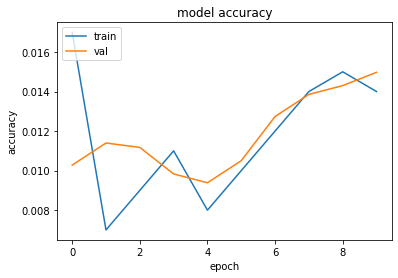

In [18]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'val'], loc='upper left')
plt.show()